In [25]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input, Flatten

import time

# 데이터 준비

## 데이터 다운로드

In [26]:
# (raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.fashion_mnist.load_data()

In [27]:
print(raw_train_x.shape)
print(raw_train_y.shape)
print(raw_test_x.shape)
print(raw_test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [28]:
print(raw_train_x[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

9


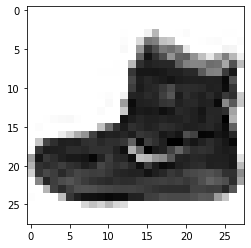

In [29]:
plt.imshow(raw_train_x[0], cmap=plt.cm.binary)
print(raw_train_y[0])

9


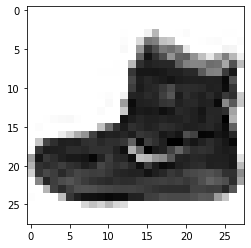

0


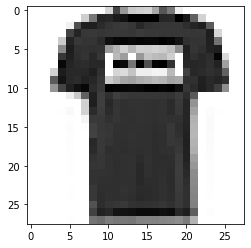

0


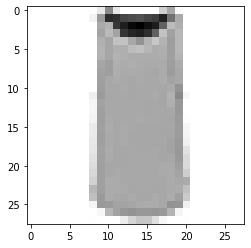

3


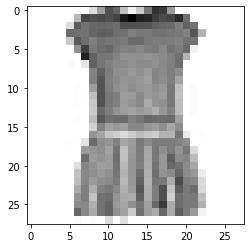

In [30]:
for i in range(4):
  print(raw_train_y[i])
  plt.imshow(raw_train_x[i], cmap=plt.cm.binary)
  plt.show()


## Normalization

In [31]:
print(np.max(raw_train_x[:,]))
print(np.max(raw_test_x[:,]))

train_x = raw_train_x/255
test_x = raw_test_x/255

train_y = raw_train_y
test_y = raw_test_y

print(np.max(train_x[:,]))
print(np.max(test_x[:,]))


255
255
1.0
1.0


In [32]:
train_x = train_x.reshape((60000, 28*28))
test_x = test_x.reshape((10000, 28*28))

print(train_x.shape)
print(test_x.shape)

(60000, 784)
(10000, 784)


# 모델 준비

In [33]:
model = keras.Sequential()
# model.add(Input(4))
model.add(Input((28*28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
# model.add(Dense(3, activation='softmax'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.8978 - accuracy: 0.7012
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5129 - accuracy: 0.8243
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4664 - accuracy: 0.8403
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4399 - accuracy: 0.8481
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4261 - accuracy: 0.8521


In [35]:
loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4503 - accuracy: 0.8436
loss= 0.4503365159034729
acc= 0.8435999751091003


[[2.2315367e-06 8.8114497e-08 1.2609138e-07 ... 8.1662506e-02
  2.7211296e-04 8.7097204e-01]
 [9.0513984e-04 1.5208100e-05 8.5798001e-01 ... 2.6873903e-18
  4.1312553e-05 6.3528081e-15]
 [6.5667182e-06 9.9981517e-01 1.4372342e-04 ... 2.7296896e-09
  3.2537682e-07 1.7605224e-16]
 ...
 [7.9341687e-02 7.0468226e-04 7.8345686e-03 ... 1.3576598e-04
  2.8119805e-01 1.3237835e-04]
 [1.8798981e-05 9.9510264e-01 1.8788414e-04 ... 1.2986296e-06
  7.7106424e-06 3.6432846e-10]
 [5.0221651e-04 7.4445983e-05 2.3437389e-04 ... 3.4904134e-02
  1.0094000e-02 1.1959073e-02]]
[9 2 1 ... 6 1 5]
9


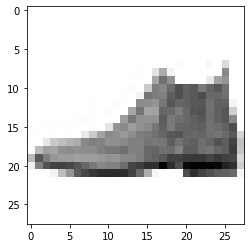

2


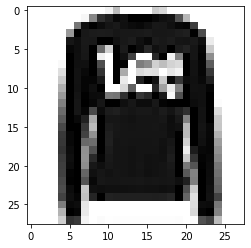

1


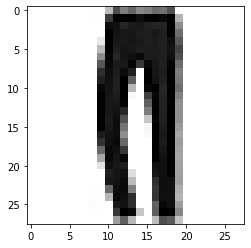

1


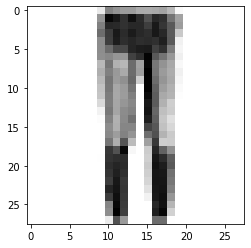

In [36]:
y_ = model.predict(test_x)
print(y_)
predicted = np.argmax(y_, axis=1)
print(predicted)

for i in range(4):
  print(predicted[i])
  plt.imshow(raw_test_x[i], cmap=plt.cm.binary)
  plt.show()

# 한눈에 모아보면

In [37]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

import time

In [38]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

train_x = raw_train_x/255
test_x = raw_test_x/255

train_y = raw_train_y
test_y = raw_test_y

train_x = train_x.reshape((60000, 28*28))
test_x = test_x.reshape((10000, 28*28))


In [39]:
model = keras.Sequential()
model.add(Input((28*28)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.8641 - accuracy: 0.7381
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3655 - accuracy: 0.8969
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3171 - accuracy: 0.9105
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2920 - acc

# Flatten 레이어 사용

(None, 28, 28) shape의 train_x를 그대로 사용.

모델의 처음에 Flatten() 레이어를 두어, 입력 모양을 변경한다.


In [40]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input, Flatten

import time

In [41]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

train_x = raw_train_x/255
test_x = raw_test_x/255

train_y = raw_train_y
test_y = raw_test_y


# train_x = train_x.reshape((60000, 28*28)) # COMMENT OUT
# test_x = test_x.reshape((10000, 28*28)) # COMMENT OUT

In [42]:
model = keras.Sequential()
# model.add(Input((28*28)))
model.add(Input((28,28)))  # ADD
model.add(Flatten())       # ADD
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.8511 - accuracy: 0.7421
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3987 - accuracy: 0.8877
Epoch 3/5
469/469 [==============================] -

# DNN classification Template

In [43]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

import time


(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

train_x = train_x/255
test_x = test_x/255


model = keras.Sequential()
model.add(Input((28,28)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.9194 - accuracy: 0.7183
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3863 - accuracy: 0.8917
Epoch 3/5
469/469 [==============================] -